**Dosyalari tekrar cagirma**

---



In [14]:
import numpy  as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns
import pandas as pd

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# x_train, y_train, x_val, y_val, x_test ve y_test verilerini cagiralim.

X_train = pickle.load(open("/content/drive/MyDrive/transfer_learning/pickles/X_train.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/transfer_learning/pickles/y_train.pickle", "rb"))

X_val = pickle.load(open("/content/drive/MyDrive/transfer_learning/pickles/X_val.pickle", "rb"))
y_val = pickle.load(open("/content/drive/MyDrive/transfer_learning/pickles/y_val.pickle", "rb"))

X_test = pickle.load(open("/content/drive/MyDrive/transfer_learning/pickles/X_test.pickle", "rb"))
y_test = pickle.load(open("/content/drive/MyDrive/transfer_learning/pickles/y_test.pickle", "rb"))


**Keras icinden model secerek model olusturma ve egitme**

---



In [17]:
# temel model olarak MobileNetV2 belirledik. parametrelerini girelim.
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                     weights = 'imagenet',
                                                     input_shape = (128,128,3),
                                                     pooling="max")

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
# dropout gibi tekniklerle gerekli x degerine ulasarak bir sonuc tahmin edelim.
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

In [19]:
# son olarak modeli olusturalim.
head_model = tf.keras.Model(inputs = base_model.input, outputs = predictions)

In [20]:
# modelimizi calistiralim.
head_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [21]:
# 25 olarak belirledigimiz epoch suresince elde edilen loss, accuracy, val_loss ve val_accuracy gibi degerleri yazdiralim.
history = head_model.fit(X_train, y_train, batch_size=128, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
13/13 [==============================] - 115s 8s/step - loss: 2.0818 - accuracy: 0.5056 - val_loss: 0.6724 - val_accuracy: 0.5750
Epoch 2/25
13/13 [==============================] - 108s 8s/step - loss: 0.6752 - accuracy: 0.5819 - val_loss: 0.8718 - val_accuracy: 0.5300
Epoch 3/25
13/13 [==============================] - 109s 8s/step - loss: 0.3720 - accuracy: 0.8325 - val_loss: 3.7245 - val_accuracy: 0.5550
Epoch 4/25
13/13 [==============================] - 127s 10s/step - loss: 0.1361 - accuracy: 0.9525 - val_loss: 2.2463 - val_accuracy: 0.6350
Epoch 5/25
13/13 [==============================] - 118s 9s/step - loss: 0.0594 - accuracy: 0.9769 - val_loss: 3.4271 - val_accuracy: 0.6700
Epoch 6/25
13/13 [==============================] - 125s 10s/step - loss: 0.0198 - accuracy: 0.9931 - val_loss: 2.4389 - val_accuracy: 0.7400
Epoch 7/25
13/13 [==============================] - 128s 10s/step - loss: 0.0140 - accuracy: 0.9931 - val_loss: 0.7567 - val_accuracy: 0.8700
Epoch 8/25

In [28]:
head_model.evaluate(X_test, y_test)

7/7 [==============================] - 2s 268ms/step - loss: 2.1397 - accuracy: 0.8000


[2.1396799087524414, 0.800000011920929]

Grafikler

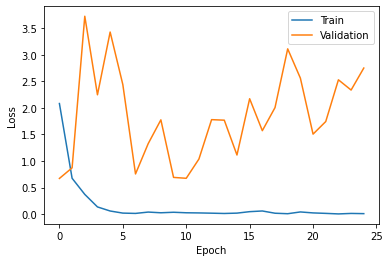

In [34]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

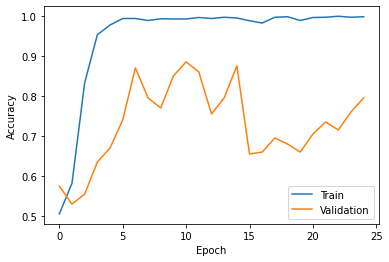

In [33]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
# egittigimiz modeli kaydedelim.
head_model.save("trained_model")